<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  87600 non-null  object 
 1   temperature_2m        87600 non-null  float64
 2   relative_humidity_2m  87600 non-null  int64  
 3   pressure_msl          87600 non-null  float64
 4   cloudcover            87600 non-null  int64  
 5   windspeed_10m         87600 non-null  float64
 6   rain                  87600 non-null  float64
 7   location              87600 non-null  object 
 8   temp_celsius          87600 non-null  float64
 9   humidity_ratio        87600 non-null  float64
 10  wind_power            87600 non-null  float64
 11  hour                  87600 non-null  int64  
 12  day_of_week           87600 non-null  int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 8.7+ MB
None
       temperature_2m  relative_humidity_2m  pressure_msl  

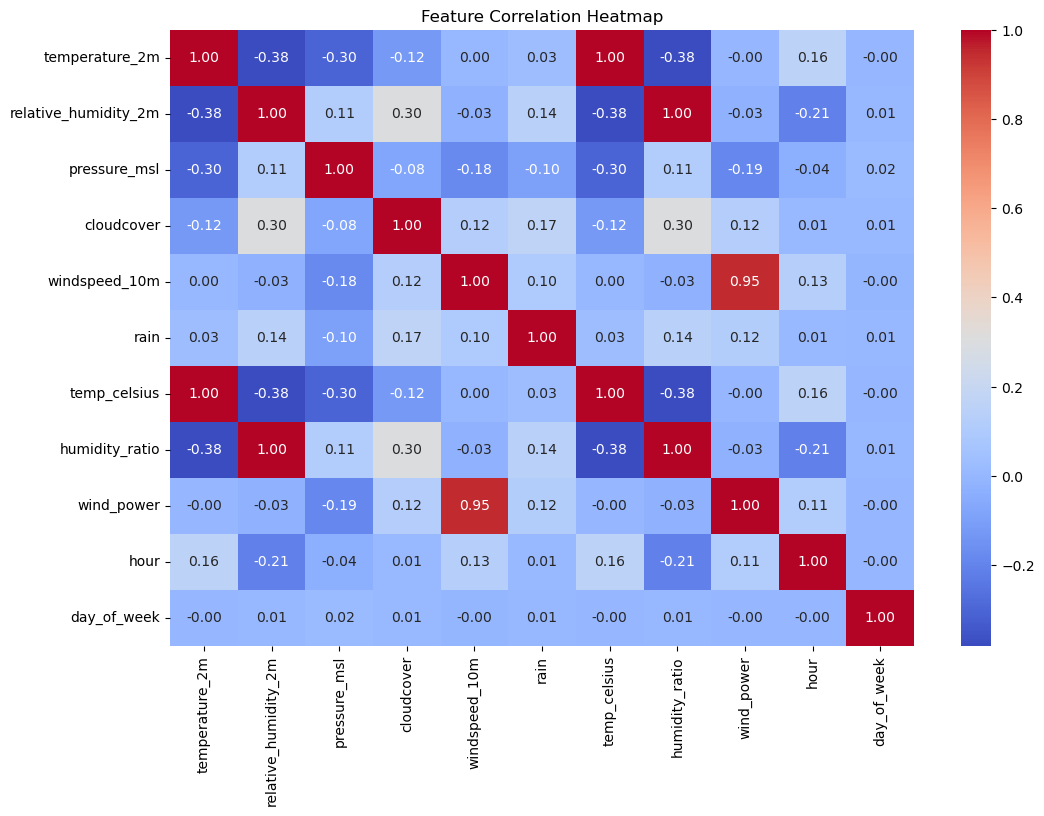

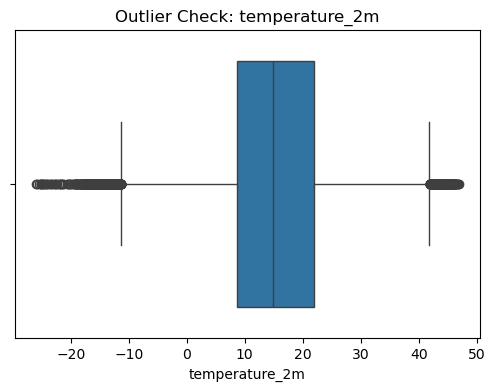

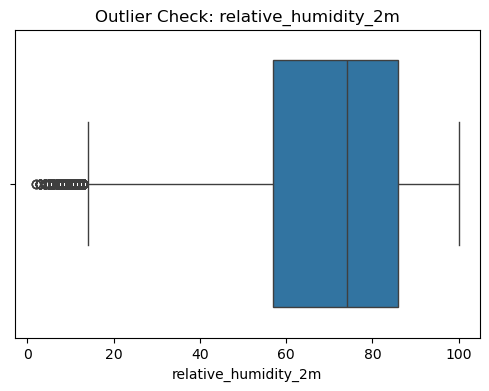

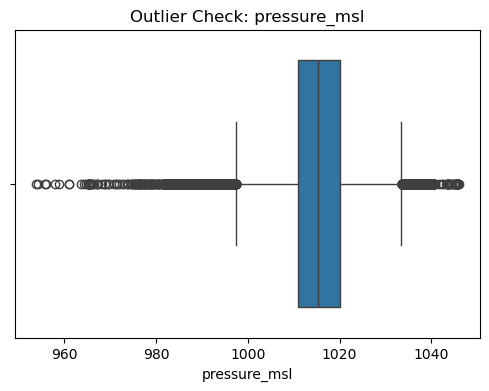

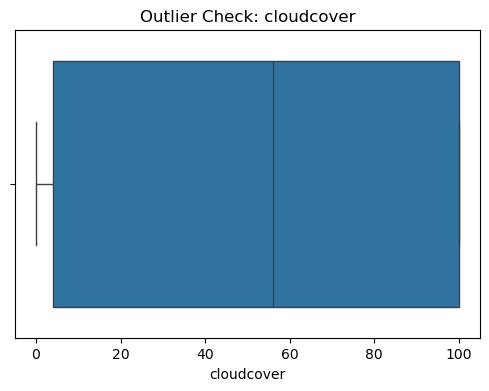

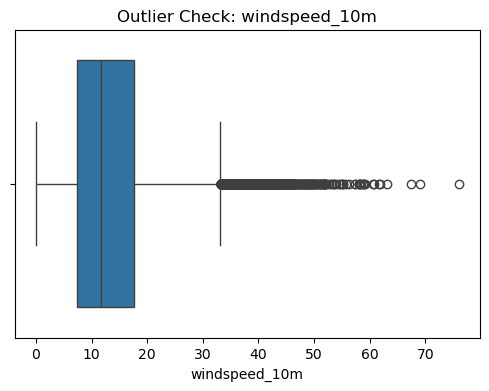

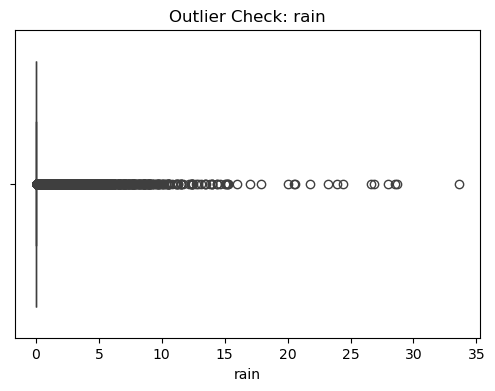

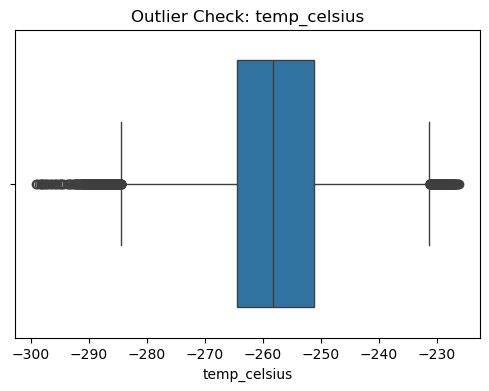

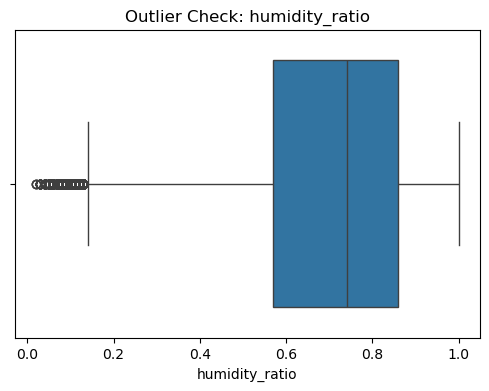

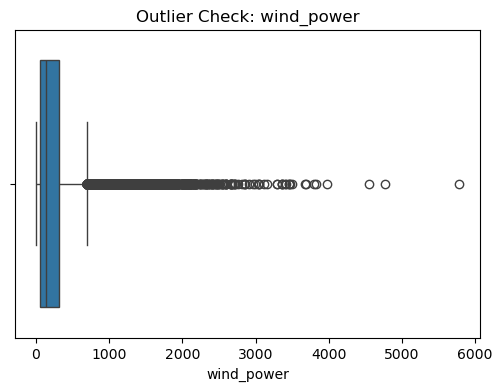

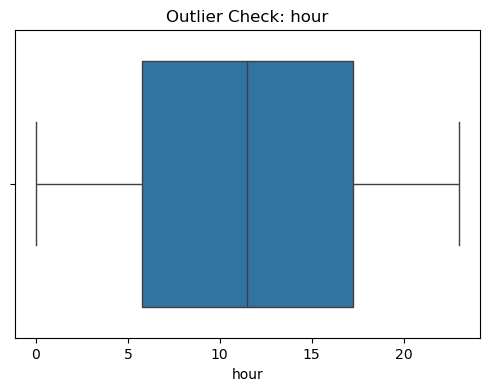

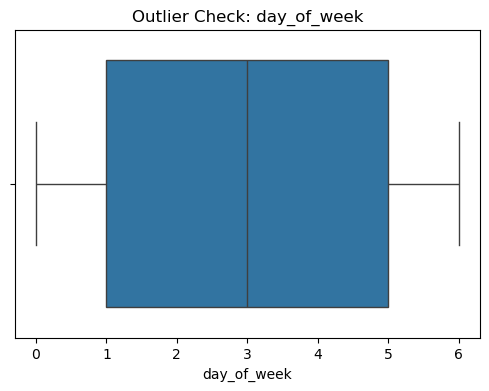

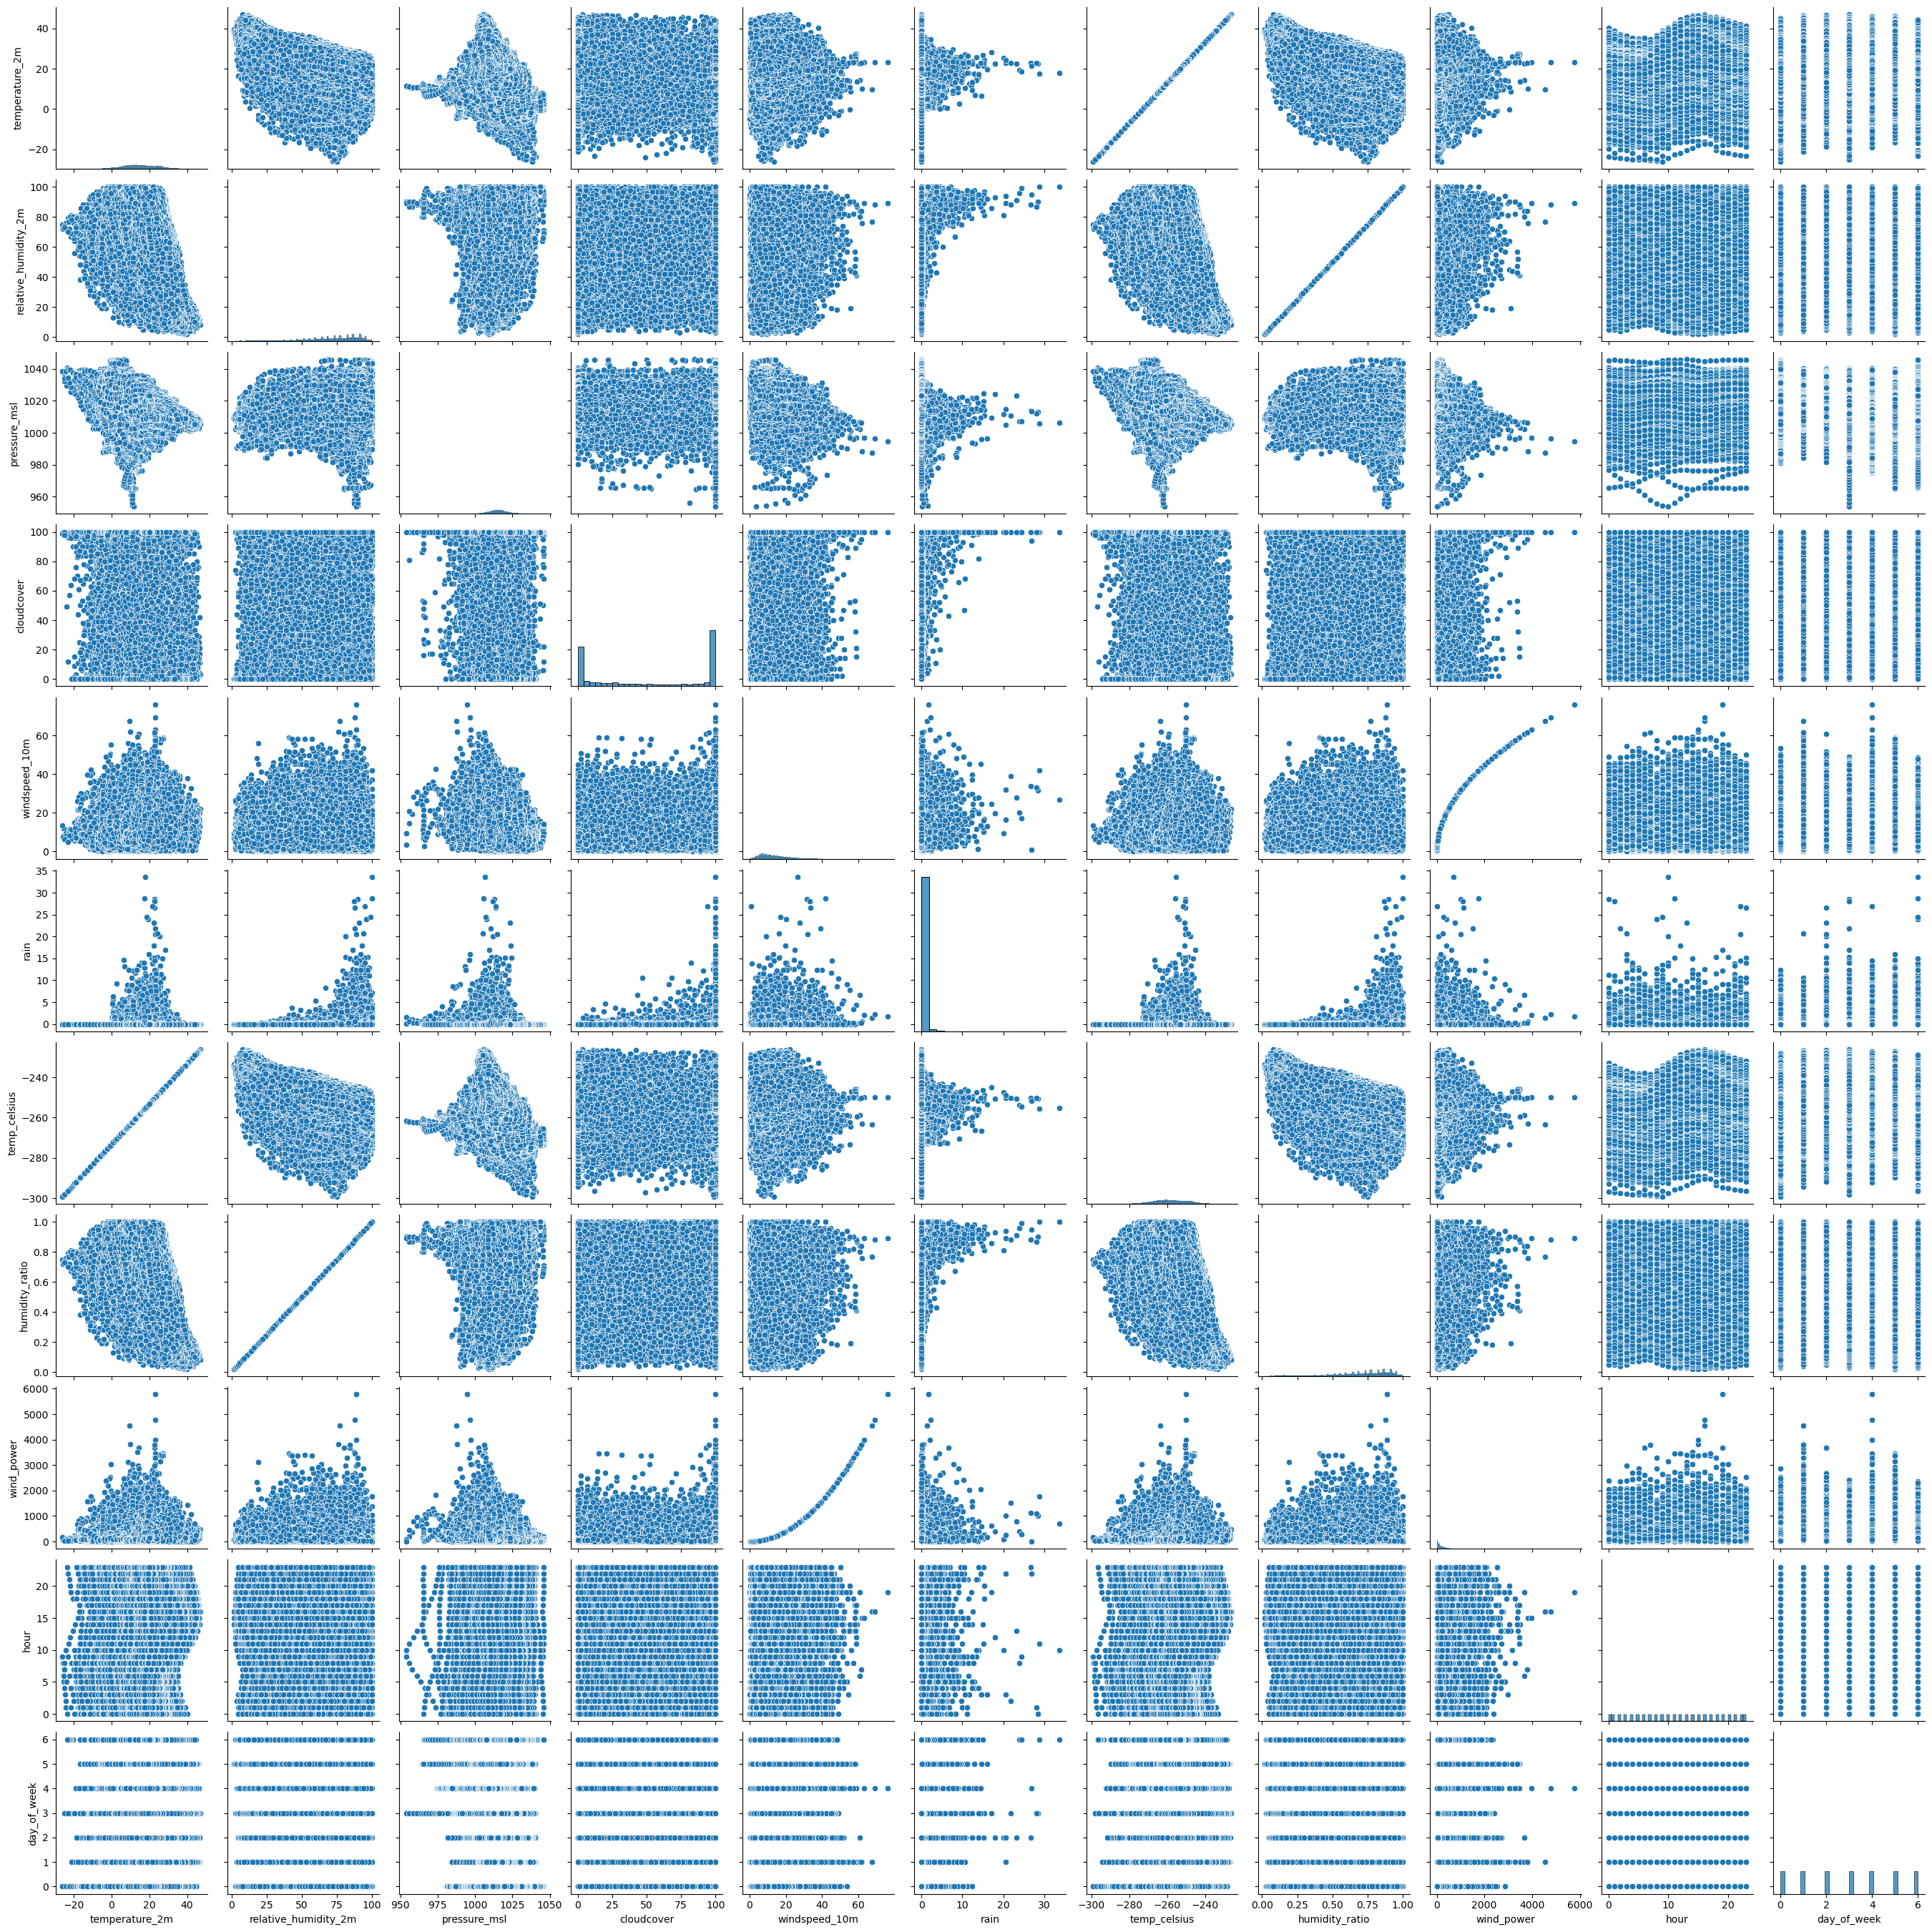

In [1]:
# notebooks/eda_weather_features.ipynb

## 1. Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Engineered Data
df = pd.read_csv("../data/processed/weather_engineered_20250812_0614.csv")

## 3. Basic Info
print(df.info())
print(df.describe())

## 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 5. Outlier Detection (Boxplots)
numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

## 6. Pairplot (Optional)
sns.pairplot(df[numeric_cols])


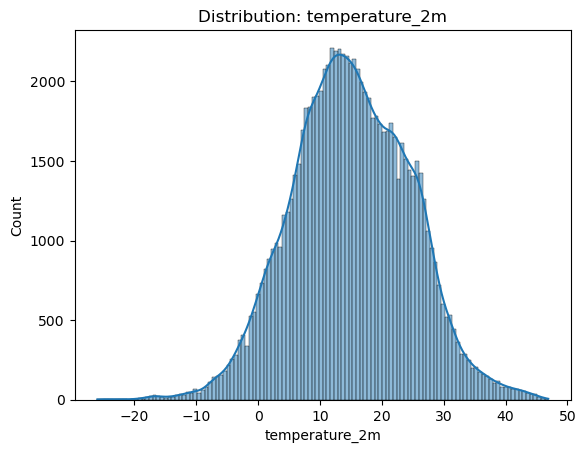

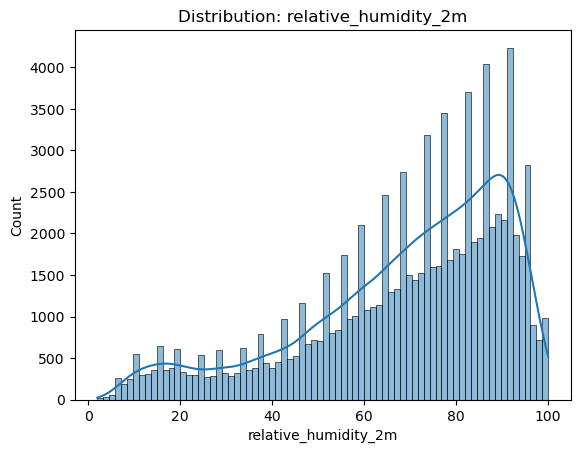

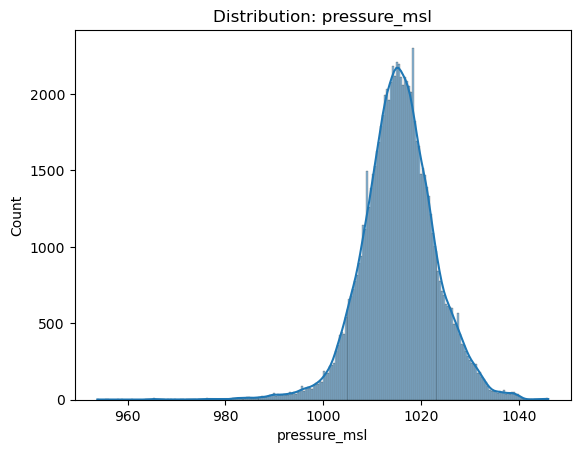

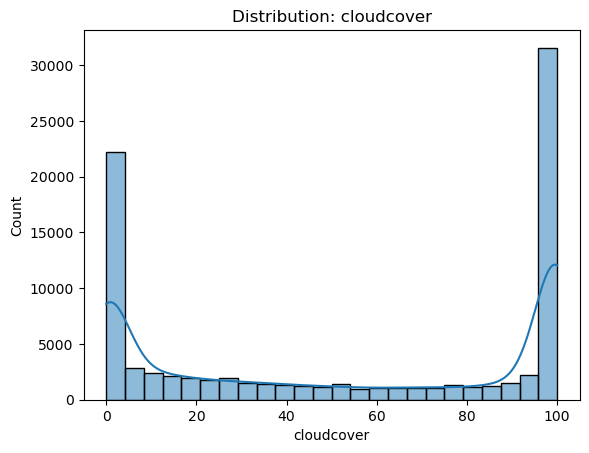

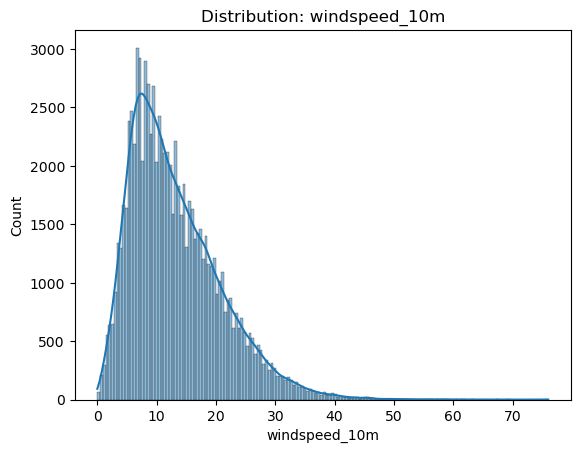

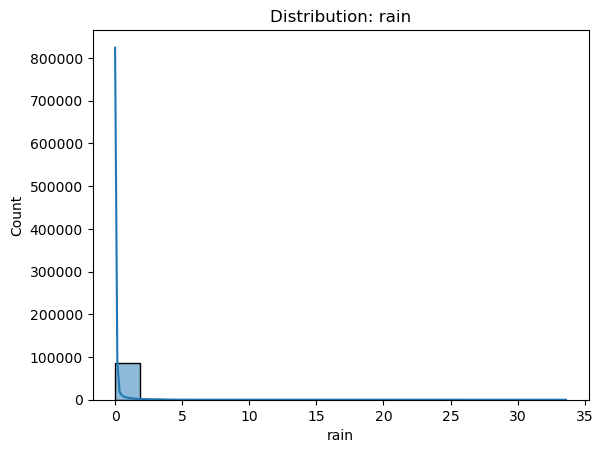

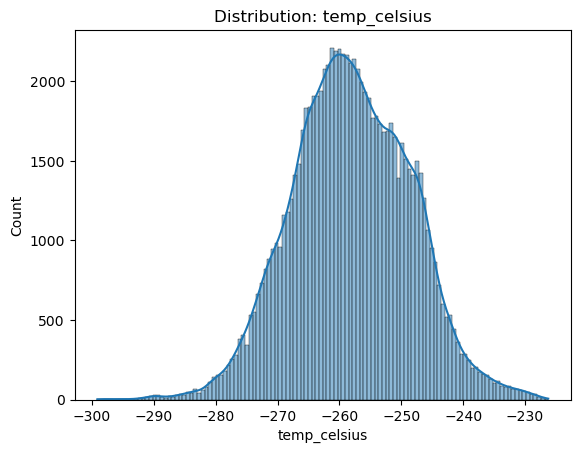

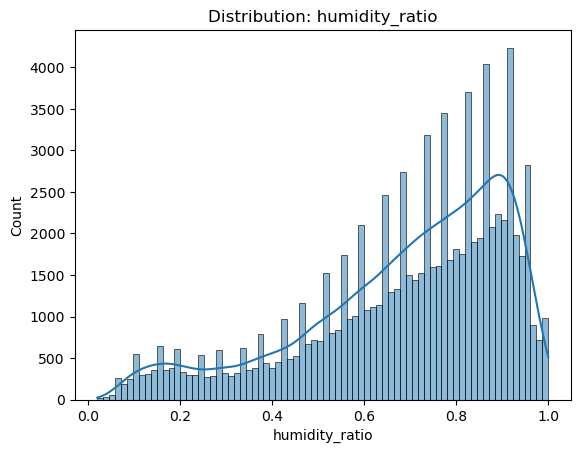

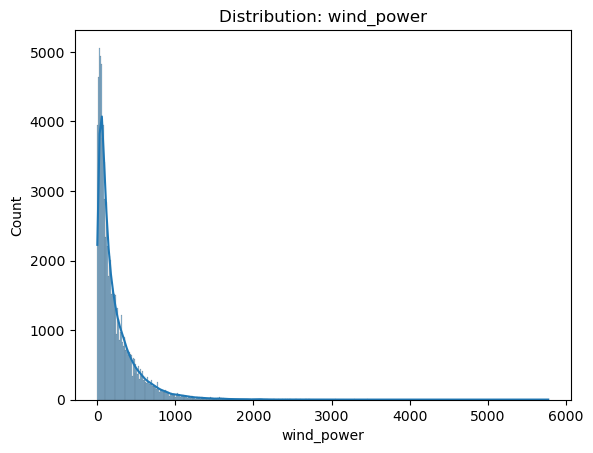

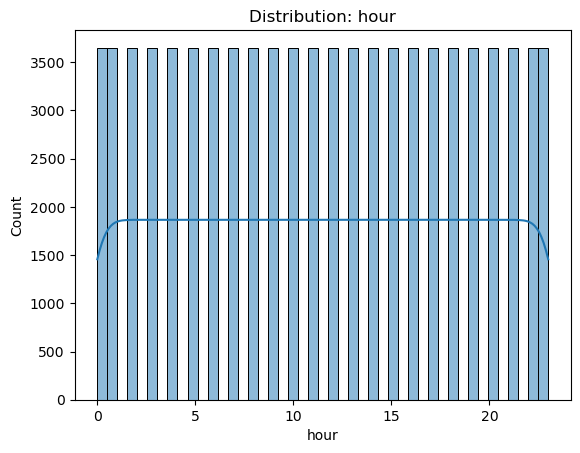

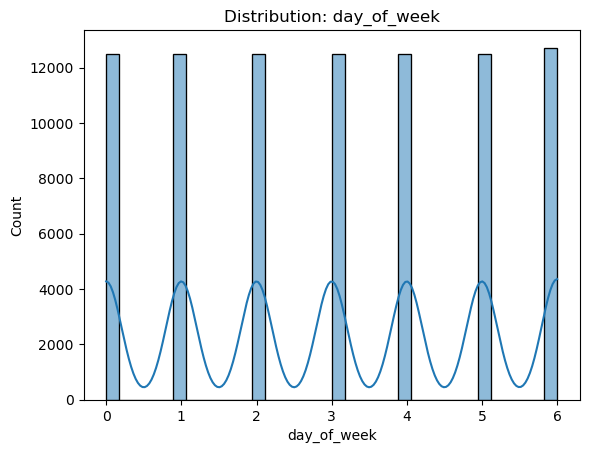

In [2]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
    plt.show()

In [5]:
# Flag outliers using IQR
def flag_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR))

df['temp_outlier'] = flag_outliers(df['temperature_2m'])
df['temp_outlier']

0        False
1        False
2        False
3        False
4        False
         ...  
87595    False
87596    False
87597    False
87598    False
87599    False
Name: temp_outlier, Length: 87600, dtype: bool